## **MNIST Classifier using Pytorch**

<p>In this notebook, we will use pytorch to classify the handwritten digits in the classic MNIST dataset. We will use a convolutional network to enhance to accuracy of our classifier than a regular neural network.</p>

<p>Let's start by loading libraries.</p>

In [ ]:
import torch 
import torchvision
import torchvision.transforms as transforms

Next step is to load and the data into train and testsets.

In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle=False)

Analysing the train set.

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

So one train data batch is a  tensor of shape: <code>(torch.Size([64, 1, 28, 28])</code> This means we have 64 examples of 28x28 gray scale images. 

Now lets see some of them randomly using matplotlib.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

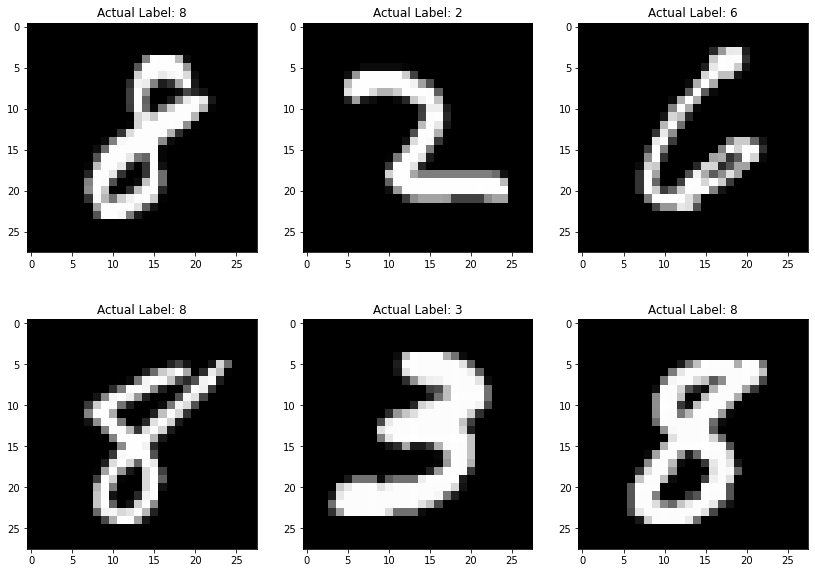

In [ ]:
plt.figure(figsize = (14, 10))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Actual Label: {}".format(labels[i]))
plt.show()

Next we will define the structure of our convolutional network.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size=  3, stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1)
    self.pool = nn.MaxPool2d(2, stride = 2)
    self.pool_dropout = nn.Dropout2d(p = 0.25)
    self.fc1 = nn.Linear(in_features = 9216, out_features = 128)
    self.fc_dropout = nn.Dropout(p = 0.5) 
    self.fc2 = nn.Linear(in_features = 128, out_features = 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool_dropout(self.pool(x))
    x = x.view(-1, 9216)
    x = F.relu(self.fc_dropout(self.fc1(x)))
    x = F.log_softmax(self.fc2(x), dim = 1)
    return x

net = Network()

Next, lets define the loss and optimizer for the network.

In [ ]:
import torch.optim as optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.003, momentum = 0.7)

Define the train function to train the model.


In [ ]:
def train(epoch):
  net.train()
  for batch_idx, (data, target) in enumerate(trainloader):
    optimizer.zero_grad()
    output = net(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
      

Define the function to calculate the training loss for the model.

In [ ]:
def train_acc():
  net.eval()
  train_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in trainloader:
      output = net(data)
      train_loss += criterion(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  train_loss /= len(testloader.dataset)
  print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    train_loss, correct, len(trainloader.dataset),
    100. * correct / len(trainloader.dataset)))

Define the function to calculate the test loss for the model.

In [ ]:
def test_acc():
  net.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in testloader:
      output = net(data)
      test_loss += criterion(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(testloader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testloader.dataset),
    100. * correct / len(testloader.dataset)))

And finally, train the model for 10 epochs.

In [ ]:
test_acc()
for epoch in range(1, 10 + 1):
  train(epoch)
  train_acc()
  test_acc()


Test set: Avg. loss: 0.0362, Accuracy: 1123/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.339756
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.155152
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.854377
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.392816
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.923087
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.092260
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.758474
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.856583
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.745803
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.573274
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.431828
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.671961
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.576946
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.423588
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.309418
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.349216
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.406852
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.372329
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.307011
Train Ep

So at the end of 10 epochs, we have train accuracy equal to and test accuracy equal to

Lets try to see how the model performs on the individual labels.

In [ ]:
classes = (0, 1,2 ,3 ,4 ,5 ,6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 100 %
Accuracy of     1 : 97 %
Accuracy of     2 : 95 %
Accuracy of     3 : 98 %
Accuracy of     4 : 97 %
Accuracy of     5 : 95 %
Accuracy of     6 : 96 %
Accuracy of     7 : 98 %
Accuracy of     8 : 100 %
Accuracy of     9 : 98 %
